<a href="https://colab.research.google.com/github/urmiMahapatra/Credit_Card_Fraud_Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:
 1. A credit card is a small thin plastic or fiber card that incorporates
 information about the person such as a picture or signature and the
 person’s name on it to charge purchases and services to his linked
 account. Charges are debited regularly. Nowadays, card data is read by
 ATMs, swiping machines, store readers, banks and online transactions.
 2. Each card has a unique card number which is very important. Its security
 mainly relies on the physical security of the card and also the privacy of the
 credit card number. There is a rapid growth in credit card transactions
 which has led to substantial growth in scam cases.
 3. Credit card fraud is expanding heavily because fraud financial loss is
 increasing drastically. Multiple data mining and statistical techniques are
 used to catch fraud. Therefore the detection of fraud using efficient and
 secured methods are very important.

## Tasks To Be Performed:
 1. Load the dataset using the pandas module.
 2. Perform missing value analysis on the dataset.
 3. From the dataset, calculate the number of genuine transactions, number of
 fraud transactions and the percentage of fraud transactions.
 4. Using the visualization module, visualize the genuine and fraudulent
 transactions using a bar graph.
 5. Using the Standard Scaler module, normalize the amount column and
 store the new values in the NormalizedAmount column.
 6. Split the dataset in train and test set and have a 70:30 split ratio for the
 model.
 7. Now use a decision tree and random forest model for training on top of the
 train set.
 8. Compare the predictions of both models using predict().
 9. Compare the accuracy of both models using score().
 10. Check the performance matrix of both models and compare which
 model is having the highest performance.

In [ ]:
# import the libreary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking missing value
data.isnull().sum().sum()

0

In [ ]:
# checking duplicacy
data.duplicated().sum()

1081

In [ ]:
# removing duplicated data
data= data.drop_duplicates()
data.shape

(283726, 31)

In [ ]:
data["Amount"].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# calculation of fraud transection and genuine transection
fraud_txn= data[data["Class"]==1].value_counts().sum()
genuine_txn = data[data["Class"]==0].value_counts().sum()
percentege_fraud_txn= (fraud_txn/(data.shape[0]))*100

print(f"fraud transection count is {fraud_txn} , genuine transection count is {genuine_txn} and percentage of the fraud transection is {percentege_fraud_txn} ")

fraud transection count is 473 , genuine transection count is 283253 and percentage of the fraud transection is 0.1667101358352777 


In [ ]:
# visulizing the fraud and non fraud txn
plt.figure(figsize=(10,6))
sns.barplot(x=data["Class"],label="class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


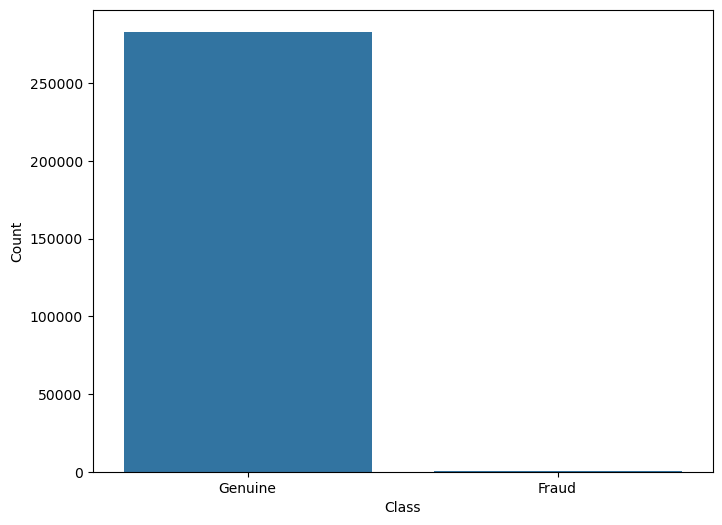

In [ ]:
labels= ["Genuine","Fraud"]
plt.figure(figsize=(8,6))
count= data["Class"].value_counts()
sns.barplot(x=count.index,y= count.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(range(2),labels)
plt.bar()
plt.show()


In [ ]:
count= data.value_counts(data["Class"])
count

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
# normalization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
data["NormalizedAmount"] = sc.fit_transform(data["Amount"].values.reshape(-1,1)) # reshape for 2d data
data.head()


C:\Users\urmim\AppData\Local\Temp\ipykernel_22552\4100473998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["NormalizedAmount"] = sc.fit_transform(data["Amount"].values.reshape(-1,1))


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073813


In [ ]:
# store the data without time and amount.
new_data= data.drop(columns=["Amount","Time"])
new_data


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313391


In [ ]:
# Spliiting the dataset
from sklearn.model_selection import train_test_split

X= new_data.drop(columns=["Class"])
y=new_data["Class"]

# As the data is highly imbalance so using SMOTE teqnique(Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy="auto",random_state=42)
X_res,y_res = smote.fit_resample(X,y)
x_train, x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42)



# Decision Tree and Random Forest Model

In [ ]:
# Decision tree and random forest import and predict the accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
dt= DecisionTreeClassifier()
rfc= RandomForestClassifier(n_estimators=100)

dt.fit(x_train,y_train)
prediction_dt=dt.predict(x_test)



In [ ]:
rfc.fit(x_train,y_train)
prediction_rfc=rfc.predict(x_test)



In [ ]:
Difference_models= pd.DataFrame()
Difference_models["Decision_Tree_Prediction"]=prediction_dt
Difference_models["Random_Forest_Prediction"]=prediction_rfc

Difference_models

,Decision_Tree_Prediction,Random_Forest_Prediction
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
169947,1,1
169948,0,0
169949,1,1
169950,0,0


In [ ]:
# Accuracy score of both the models

from sklearn.metrics import *

Accuracy_DT= accuracy_score(y_test,prediction_dt)
Accuracy_RFC= accuracy_score(y_test,prediction_rfc)

print(f"Accuracy score of decision tree is:{Accuracy_DT} and Accuracy score of Random Forest is:{Accuracy_RFC}")


Accuracy score of decision tree is:0.9978994068913576 and Accuracy score of Random Forest is:0.9998411316136321


In [ ]:
# Compare the performance matrix
def metrics(Actual,Prediction):
    Acuracy_score=accuracy_score(Actual,Prediction)
    Precision= precision_score(Actual,Prediction)
    Recall= recall_score(Actual,Prediction)
    F1_Score= f1_score(Actual,Prediction)
    cm= confusion_matrix(Actual,Prediction)


    return (f"""Accuracy Score: {Acuracy_score:.5f}"
    Precision Score: {Precision:.5f}
    Recall Score: {Recall:.5f}
    F1- Score: {F1_Score:.5f}
    Confusion Matrix:{cm}""")


In [ ]:
print(f"""Preformance Metrics of Decision Tree is:
        {metrics(y_test,prediction_dt)}""")


Preformance Metrics of Decision Tree is:
        Accuracy Score: 0.99790"
    Precision Score: 0.99702
    Recall Score: 0.99879
    F1- Score: 0.99790
    Confusion Matrix:[[84626   254]
 [  103 84969]]


In [ ]:
print(f"""Preformance Metrics of Random Forest is:
            {metrics(y_test,prediction_rfc)}""")

Preformance Metrics of Random Forest is:
            Accuracy Score: 0.99984"
    Precision Score: 0.99968
    Recall Score: 1.00000
    F1- Score: 0.99984
    Confusion Matrix:[[84853    27]
 [    0 85072]]


In [ ]:
# best model

if Accuracy_DT > Accuracy_RFC :
    print("More accurate model is decision tree")
else:
    print("More accurate model is Random forest")


More accurate model is Random forest
